# Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load CSV file

In [2]:
df=pd.read_csv("data/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Define X and Y

In [4]:
x=df.iloc[:,:-1].values
y=df.loc[:,'DEATH_EVENT'].values

# Split to train and test

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [6]:
print("***** X-Values *****")
print(x_train)
print("***** It's Shape *****")
print(x_train.shape)
print("*****Y-Values*****")
print(y_train)
print("***** It's Shape *****")
print(y_train.shape)


***** X-Values *****
[[7.000e+01 1.000e+00 1.430e+02 ... 0.000e+00 0.000e+00 9.000e+01]
 [8.700e+01 1.000e+00 1.490e+02 ... 1.000e+00 0.000e+00 1.400e+01]
 [4.500e+01 0.000e+00 7.702e+03 ... 1.000e+00 0.000e+00 6.000e+01]
 ...
 [6.000e+01 0.000e+00 8.970e+02 ... 1.000e+00 0.000e+00 8.000e+01]
 [7.000e+01 0.000e+00 6.900e+01 ... 0.000e+00 0.000e+00 7.500e+01]
 [6.400e+01 1.000e+00 6.200e+01 ... 0.000e+00 0.000e+00 1.740e+02]]
***** It's Shape *****
(239, 12)
*****Y-Values*****
[1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
***** It's Shape *****
(239,)


# Instantiate KNN

In [7]:
model=KNeighborsClassifier(n_neighbors=5)

In [8]:
model.fit(x_train,y_train)

KNeighborsClassifier()

# Predict on Test Data

In [9]:
y_pred=model.predict(x_test)

# Evaluation Metrics

In [10]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report

In [11]:
print("Model's acuracy :",accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test))
print("Precision-Score :",precision_score(y_pred,y_test))
print("F1-Score :",f1_score(y_pred,y_test))

Model's acuracy : 0.7166666666666667
Recall-Score : 0.5
Precision-Score : 0.23529411764705882
F1-Score : 0.31999999999999995


In [12]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82        52
           1       0.24      0.50      0.32         8

    accuracy                           0.72        60
   macro avg       0.57      0.62      0.57        60
weighted avg       0.82      0.72      0.75        60



# Confusion Matrix

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

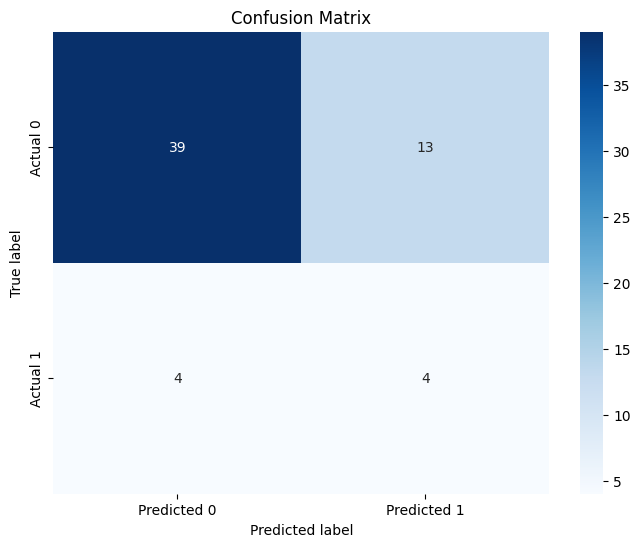

In [14]:

# Compute confusion matrix
cm = confusion_matrix(y_pred , y_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()